In [31]:
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
X,y = mglearn.datasets.make_forge()

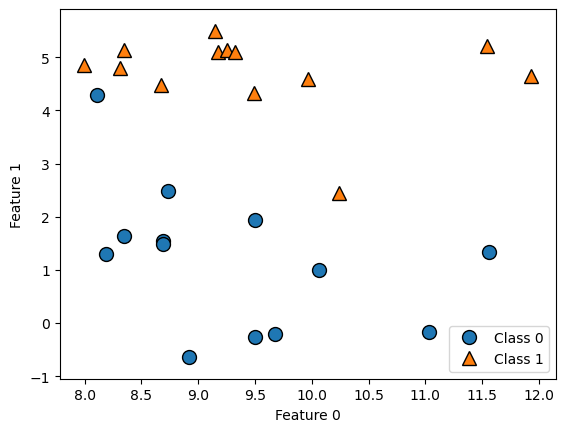

In [14]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(["Class 0","Class 1"])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


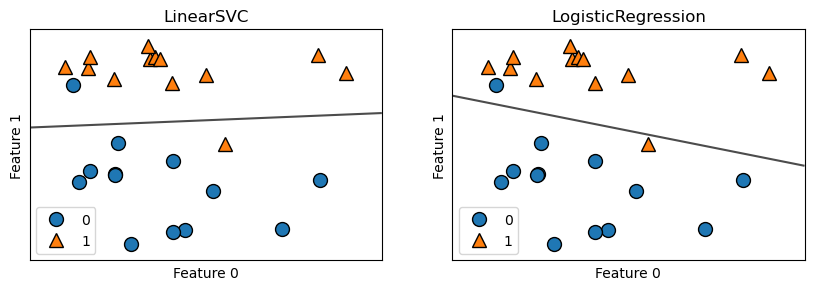

In [29]:
fig , axes = plt.subplots(1,2,figsize=(10,3))
for model,ax in zip([LinearSVC(),LogisticRegression()],axes):
    mod = model.fit(X,y)
    mglearn.plots.plot_2d_separator(mod,X,ax=ax,alpha=.7,eps=0.5,fill=False)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    ax.set_title(mod.__class__.__name__)
    ax.legend()

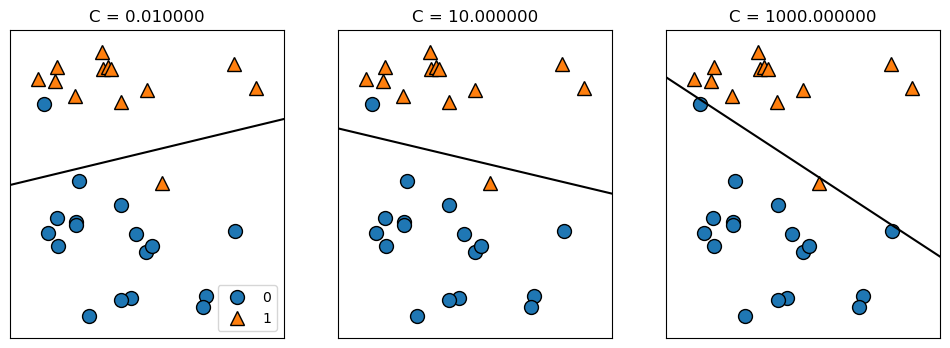

In [30]:
mglearn.plots.plot_linear_svc_regularization()

# Model 1(Logistic Regression with c=1)

In [51]:
df = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(df.data,df.target,stratify=df.target,random_state=42)

In [53]:
log1 = LogisticRegression(max_iter=100000).fit(X_train,y_train)

In [54]:
print("Accuracy on Training Data is : ",log1.score(X_train,y_train))
print("Accuracy on Testing Data is : ",log1.score(X_test,y_test))

Accuracy on Training Data is :  0.9577464788732394
Accuracy on Testing Data is :  0.958041958041958


# Model 2(Logistic Regression with c=10)

In [66]:
log10 = LogisticRegression(C=100,max_iter=100000).fit(X_train,y_train)

In [67]:
print("Accuracy on Training Data is : ",log10.score(X_train,y_train))
print("Accuracy on Testing Data is : ",log10.score(X_test,y_test))

Accuracy on Training Data is :  0.9859154929577465
Accuracy on Testing Data is :  0.972027972027972


# Model 3(Logistic Regression with c=0.1)

In [64]:
log01 = LogisticRegression(C=0.001,max_iter=10000).fit(X_train,y_train)

In [65]:
print("Accuracy on Training Data is : ",log01.score(X_train,y_train))
print("Accuracy on Testing Data is : ",log01.score(X_test,y_test))

Accuracy on Training Data is :  0.9530516431924883
Accuracy on Testing Data is :  0.9440559440559441


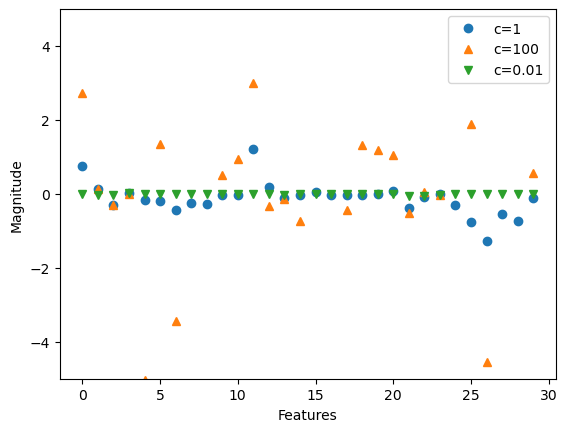

In [71]:
plt.plot(log1.coef_.T,"o",label="c=1")
plt.plot(log10.coef_.T,"^",label="c=100")
plt.plot(log01.coef_.T,"v",label="c=0.01")
plt.ylim(-5,5)
plt.xlabel("Features")
plt.ylabel("Magnitude")
plt.legend()